# Project -  Data Preparation I

This is the second part of the AC data mining project. In this notebook, you will find the proccess of data preparation consisting in merging some of the tables, access data quality, outlier treatment and feature engineering.

## Import of the needed packages

In [4]:
import pandas as pd #manipulação de dados
import matplotlib.pyplot as plt #plotagem de gráficos   
import seaborn as sns #plotagem de gráficos mais bonitos e com mais recursos que o matplotlib 
import numpy as np #manipulação de dados numéricos
from sklearn.model_selection import train_test_split #divisão do dataset em treino e teste
from sklearn.metrics import r2_score #métrica de avaliação  
from sklearn.metrics import mean_absolute_error #métrica de avaliação   
from sklearn import tree #algoritmo de árvore de decisão 



In [27]:
#Carregando os valores do dataset
base = pd.read_csv('quinto_andar_transformed_data.csv')
basecpy= pd.read_csv('quinto_andar_transformed_data.csv')

#Mostrando as 5 primeiras linhas do dataset
base.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>https://www.quintoandar.com.br/imovel/89332996...</td>
      <td>Liberdade</td>
      <td>1900.0</td>
      <td>424.0</td>
      <td>5.0</td>
      <td>25.0</td>
      <td>38.0</td>
      <td>2392.0</td>
      <td>57.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>18.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>https://www.quintoandar.com.br/imovel/89334069...</td>
      <td>Santa Cecília</td>
      <td>1190.0</td>
      <td>460.0</td>
      <td>0.0</td>
      <td>16.0</td>
      <td>23.0</td>
      <td>1689.0</td>
      <td>56.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>11.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>https://www.quintoandar.com.br/imovel/89333859...</td>
      <td>Aclimação</td>
      <td>2330.0</td>
      <td>450.0</td>
      <td>5.0</td>
      <td>30.0</td>
      <td>46.0</td>
      <td>2861.0</td>
      <td>48.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>10.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>https://www.quintoandar.com.br/imovel/89337065...</td>
      <td>Liberdade</td>
      <td>1850.0</td>
      <td>418.0</td>
      <td>6.0</td>
      <td>24.0</td>
      <td>37.0</td>
      <td>2335.0</td>
      <td>44.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>https://www.quintoandar.com.br/imovel/89337700...</td>
      <td>Vila Guilherme</td>
      <td>2200.0</td>
      <td>392.0</td>
      <td>10.0</td>
      <td>28.0</td>
      <td>44.0</td>
      <td>2674.0</td>
      <td>62.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>8.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

## Análise Exploratória

In [28]:
#Verificando as informações do dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


É possivel verificar que temos 16 colunas e 2775 linhas no total. Porém, nas colunas condominio e iptu temos menos linhas. Vamos verificar o que se passa 

In [29]:
#Verificando a quantidade de valores nulos  por coluna
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

É possível verificar que na coluna condominio e iptu temos 7 e 8 valores nulos respectivamente

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [33]:
base.url[13]





'https://www.quintoandar.com.br/imovel/893377120?house_tags=newAd&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A553%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

Entendemos que valores como condómino nulo são registros de casas que realmente não possuem condomínio .                           
Uma casa, especialmente se for uma casa independente e não parte de um condomínio fechado ou comunidade planejada geralmente não paga taxa de condomínio. 

Assim, podemos substituir por 0 esses valores NaN

In [34]:
#filtrando os valores nulos da coluna condominio    

base[base['condominio'].isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Valores nulos da coluna condominio  
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>987</th>
      <td>https://www.quintoandar.com.br/imovel/89288689...</td>
      <td>Bela Vista</td>
      <td>2960.0</td>
      <td>NaN</td>
      <td>125.0</td>
      <td>49.0</td>
      <td>59.0</td>
      <td>3193.0</td>
      <td>100.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1391</th>
      <td>https://www.quintoandar.com.br/imovel/89310205...</td>
      <td>Perdizes</td>
      <td>5200.0</td>
      <td>NaN</td>
      <td>1030.0</td>
      <td>86.0</td>
      <td>104.0</td>
      <td>6420.0</td>
      <td>220.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1527</th>
      <td>https://www.quintoandar.com.br/imovel/89310896...</td>
      <td>Aclimação</td>
      <td>3000.0</td>
      <td>NaN</td>
      <td>158.0</td>
      <td>50.0</td>
      <td>60.0</td>
      <td>3268.0</td>
      <td>90.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1801</th>
      <td>https://www.quintoandar.com.br/imovel/89284189...</td>
      <td>Ipiranga</td>
      <td>2600.0</td>
      <td>NaN</td>
      <td>100.0</td>
      <td>43.0</td>
      <td>52.0</td>
      <td>2795.0</td>
      <td>100.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2287</th>
      <td>https://www.quintoandar.com.br/imovel/89288795...</td>
      <td>Ipiranga</td>
      <td>1000.0</td>
      <td>NaN</td>
      <td>80.0</td>
      <td>17.0</td>
      <td>20.0</td>
      <td>1117.0</td>
      <td>25.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2387</th>
      <td>https://www.quintoandar.com.br/imovel/89288796...</td>
      <td>Ipiranga</td>
      <td>1375.0</td>
      <td>NaN</td>
      <td>100.0</td>
      <td>23.0</td>
      <td>27.0</td>
      <td>1525.0</td>
      <td>50.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2751</th>
      <td>https://www.quintoandar.com.br/imovel/89288796...</td>
      <td>Ipiranga</td>
      <td>1375.0</td>
      <td>NaN</td>
      <td>100.0</td>
      <td>23.0</td>
      <td>27.0</td>
      <td>1525.0</td>
      <td>50.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>


In [41]:
#filtrando apenas os valores nulos da coluna condominio 

#base[base['condominio'].isnull()]['condominio']
base.loc[base['condominio'].isnull(), 'condominio']


987    NaN
1391   NaN
1527   NaN
1801   NaN
2287   NaN
2387   NaN
2751   NaN
Name: condominio, dtype: float64

<p>987    NaN </p>
<p>1391   NaN </p>
<p>1527   NaN </p>
<p>1801   NaN </p>
<p>2287   NaN </p>
<p>2387   NaN </p>
<p>2751   NaN </p>
Name: condominio, dtype: float64


In [45]:
#Atribuindo o valor 0 para os valores nulos da coluna condominio
base.loc[base['condominio'].isnull(), 'condominio'] = 0

#Verificando se ainda existem valores nulos na coluna condominio
base.condominio.isnull().sum() 

0

Já não temos nenhum valor nulo (NaN) na coluna Condomínio

###### Repetir o mesmo processo na coluna iptu

In [47]:
#Verificando os valores nulos na coluna iptu
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


O IPTU, sigla para Imposto sobre a Propriedade Predial e Territorial Urbana, é um imposto brasileiro cobrado pelos municípios sobre a propriedade de imóveis urbanos.

In [49]:
#Acessando url onde os valores da coluna iptu são nulos
base.url[base.iptu.isnull()]

321     https://www.quintoandar.com.br/imovel/89278332...
580     https://www.quintoandar.com.br/imovel/89276781...
732     https://www.quintoandar.com.br/imovel/89277791...
1348    https://www.quintoandar.com.br/imovel/89277231...
1486    https://www.quintoandar.com.br/imovel/89279154...
1709    https://www.quintoandar.com.br/imovel/89281155...
2209    https://www.quintoandar.com.br/imovel/89278332...
2659    https://www.quintoandar.com.br/imovel/89279454...
Name: url, dtype: object

In [50]:
#Podemos excluir as linhas onde os valores da coluna iptu são nulos
base.dropna(subset=['iptu'], inplace=True)

base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2767 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2767 non-null   object 
 1   bairro           2767 non-null   object 
 2   aluguel          2767 non-null   float64
 3   condominio       2767 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2767 non-null   float64
 6   taxa_serviço     2767 non-null   float64
 7   total            2767 non-null   float64
 8   metragem         2767 non-null   float64
 9   quarto           2767 non-null   float64
 10  banheiro         2767 non-null   float64
 11  vaga_carro       2767 non-null   float64
 12  andar            2767 non-null   float64
 13  aceita_pet       2767 non-null   float64
 14  mobilia          2767 non-null   float64
 15  metro_prox       2767 non-null   float64
dtypes: float64(14), object(2)
memory usage: 367.5+ KB


In [51]:
base.url

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2767, dtype: object

A coluna url não tem tanta importância na resolução do nosso problema

In [ ]:
#Eliminar a coluna url
base.drop('url', axis=1, inplace=True)



In [58]:
base.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


# Análise Exploratória de Dados 

In [59]:
#Resumo estatístico do dataset  
base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


### <font color= green> O que significa que o aluguel tem média de 2.276, devio padrão de 1.327, Mínimo de 500 e Máximo de 11.250 </font>

In [60]:
#Para incluir informações sobre as colunas não numéricas
base.describe(include='all')

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Consolação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,NaN,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,NaN,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,NaN,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,NaN,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000


In [83]:
base.aluguel[base.aluguel>500 ]

0       1900.0
1       1190.0
2       2330.0
3       1850.0
4       2200.0
         ...  
2770    2200.0
2771    1120.0
2772    1350.0
2773    1100.0
2774    4182.0
Name: aluguel, Length: 2763, dtype: float64

Visualizando os dados com gráficos

<Axes: >

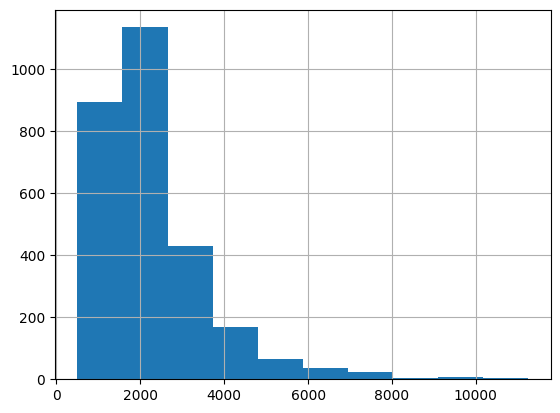

In [67]:
#Plotando um histograma para a coluna aluguel
base.aluguel.hist()



<Axes: >

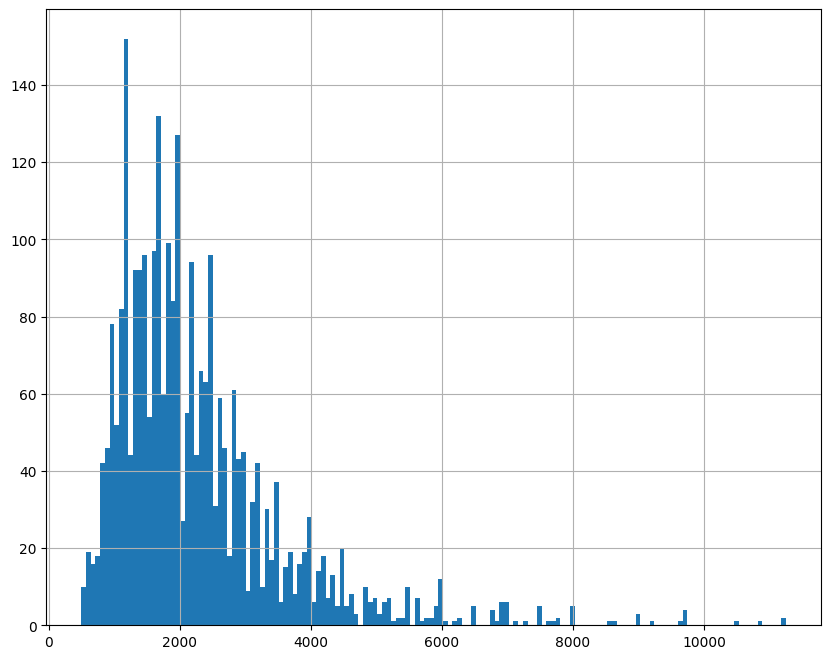

In [81]:
base.aluguel.hist(bins=150, figsize=(10,8))

No histograma, o eixo horizontal (eixo x) representa os intervalos de preço de aluguel, enquanto o eixo vertical (eixo y) mostra quantos imóveis caem em cada faixa de preço.

A partir do histograma, podemos observar que a maioria dos aluguéis concentra-se em faixas de preço mais baixas, com uma diminuição gradual na frequência conforme o preço do aluguel aumenta.

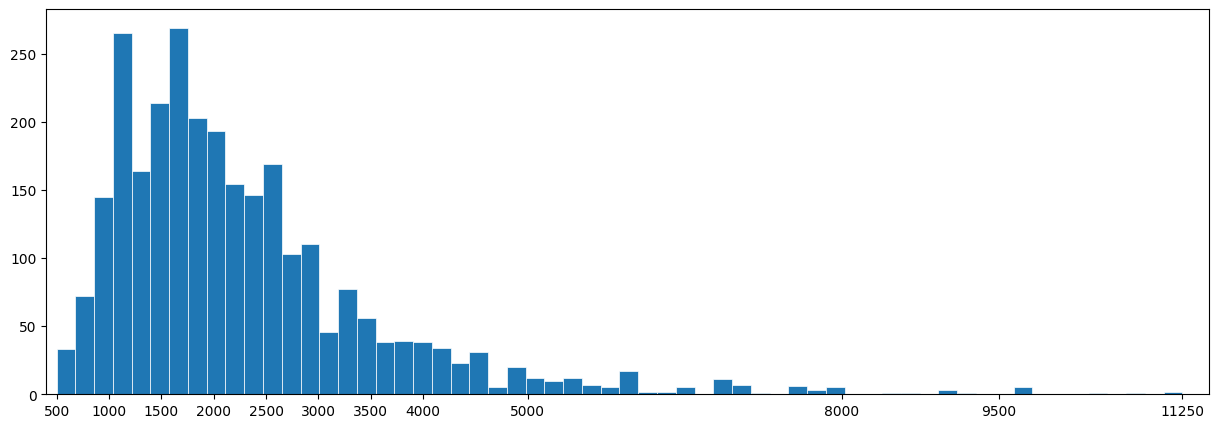

In [86]:


fig, ax = plt.subplots (figsize = (15, 5))
ax.hist(base.aluguel, bins=60, linewidth=0.5, edgecolor= "white")
ax.set(xlim=(400, 11500), xticks= [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000, 8000, 9500, 11250])
plt.show()

In [89]:
#Vamos ordenar os valores da coluna aluguel em ordem decrescente
base.sort_values('aluguel',ascending=False).head(10)


,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


Podemos perceber porque é necessário um novo tratamento na base durante o processo da análise exploratória


Vamos tentar verificar linhas duplicadas

In [91]:
# Verificado se existem valores duplicadas na base
#base.duplicated().sum()
base[base.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
77,Barra Funda,1060.0,287.0,0.0,14.0,21.0,1382.0,50.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
176,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
267,Paraíso,3400.0,1372.0,360.0,44.0,68.0,5244.0,147.0,3.0,3.0,1.0,4.0,1.0,0.0,1.0
306,Perdizes,2150.0,0.0,0.0,28.0,43.0,2221.0,72.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>77</th>
      <td>Barra Funda</td>
      <td>1060.0</td>
      <td>287.0</td>
      <td>0.0</td>
      <td>14.0</td>
      <td>21.0</td>
      <td>1382.0</td>
      <td>50.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>176</th>
      <td>Belém</td>
      <td>1200.0</td>
      <td>200.0</td>
      <td>20.0</td>
      <td>20.0</td>
      <td>24.0</td>
      <td>1464.0</td>
      <td>30.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>250</th>
      <td>Belém</td>
      <td>1200.0</td>
      <td>200.0</td>
      <td>20.0</td>
      <td>20.0</td>
      <td>24.0</td>
      <td>1464.0</td>
      <td>30.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>267</th>
      <td>Paraíso</td>
      <td>3400.0</td>
      <td>1372.0</td>
      <td>360.0</td>
      <td>44.0</td>
      <td>68.0</td>
      <td>5244.0</td>
      <td>147.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>4.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>306</th>
      <td>Perdizes</td>
      <td>2150.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>28.0</td>
      <td>43.0</td>
      <td>2221.0</td>
      <td>72.0</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2767</th>
      <td>Vila Nova Conceição</td>
      <td>3090.0</td>
      <td>900.0</td>
      <td>184.0</td>
      <td>40.0</td>
      <td>61.0</td>
      <td>4275.0</td>
      <td>85.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>12.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2770</th>
      <td>Aclimação</td>
      <td>2200.0</td>
      <td>0.0</td>
      <td>72.0</td>
      <td>37.0</td>
      <td>44.0</td>
      <td>2353.0</td>
      <td>90.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2771</th>
      <td>Santa Cecília</td>
      <td>1120.0</td>
      <td>280.0</td>
      <td>0.0</td>
      <td>15.0</td>
      <td>22.0</td>
      <td>1437.0</td>
      <td>32.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>7.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2773</th>
      <td>Aclimação</td>
      <td>1100.0</td>
      <td>308.0</td>
      <td>16.0</td>
      <td>14.0</td>
      <td>22.0</td>
      <td>1460.0</td>
      <td>30.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>7.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2774</th>
      <td>Jardim Paulista</td>
      <td>4182.0</td>
      <td>887.0</td>
      <td>302.0</td>
      <td>53.0</td>
      <td>83.0</td>
      <td>5507.0</td>
      <td>130.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>5.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
<p>650 rows × 15 columns</p>
</div>


Temos 650 valores duplicados, isso é muito. Então vamos eliminar esses valores

In [93]:
#Excluindo as linhas duplicadas
base.drop_duplicates(inplace=True)

base[base.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox


Existe alguma relação entre Alguer e Metragem?

Vamos visualizar num gráfico a relação entre as duas

<Axes: xlabel='aluguel', ylabel='metragem'>

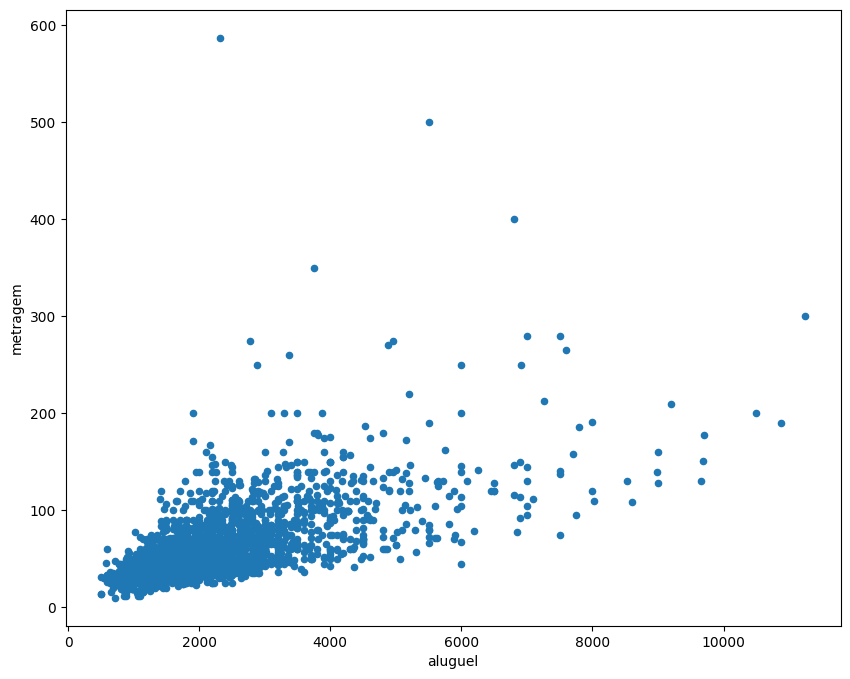

In [94]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem
base.plot.scatter(x='aluguel', y='metragem', figsize=(10,8))

Quanto menor a metragem menor é o preço do aluguer.

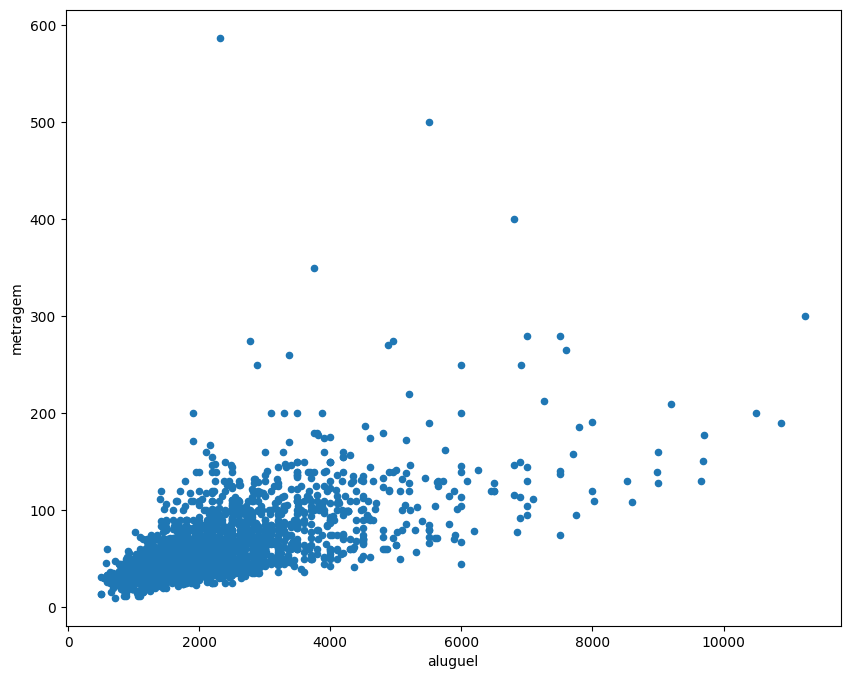

## Seaborn
<p>É uma biblioteca de visualização de dados em Python baseada no Matplotlib.</p> 
<p>Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. </p>
<p>É especialmente útil para explorar e entender dados através de visualizações que podem revelar padrões e insights</p>

C:\Users\Elvis\AppData\Local\Temp\ipykernel_3288\3429461776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (x='metro_prox', y='aluguel', data=base, orient='v', width=0.5, palette='colorblind')


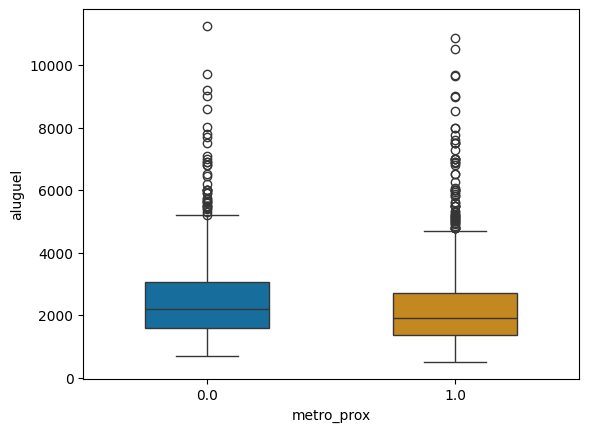

In [114]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metrmetro_proxagem
#base.plot.scatter(x='aluguel', y='metragem', figsize=(10,8), xlim=(0, 10000), ylim=(0, 200))
#base.sns.boxplot (x='aluguel', y='metragem', data=base) 

sns.boxplot (x='metro_prox', y='aluguel', data=base, orient='v', width=0.5, palette='colorblind')
plt.show()

Que tal fazermos uma relação entre o bairro e o aluguel, para vermos se tem bairros em que o alguer se torna muito caro

C:\Users\Elvis\AppData\Local\Temp\ipykernel_3288\3082157062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (x='aluguel', y='bairro', data=base, width=0.5,orient= 'h', palette='colorblind' )


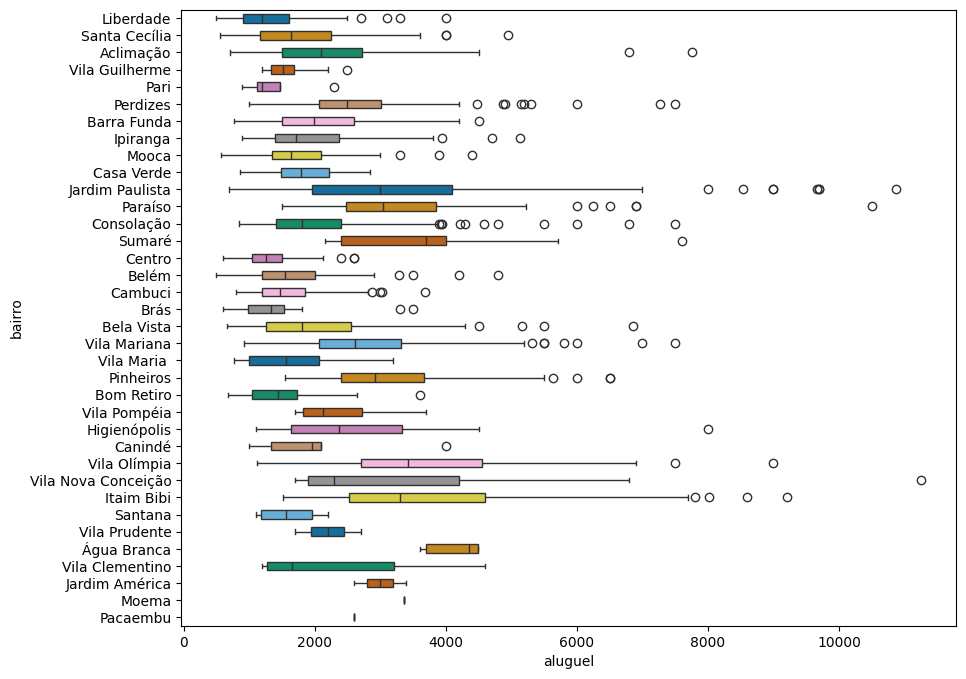

In [119]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e bairro
#Aumentar o tamanho da figura
plt.figure(figsize=(10,8))
sns.boxplot (x='aluguel', y='bairro', data=base, width=0.5,orient= 'h', palette='colorblind' )
plt.show()


In [120]:
#Verificando a quantidade de imóveis por bairro
base.bairro.value_counts()

bairro
Consolação             271
Jardim Paulista        190
Bela Vista             187
Santa Cecília          178
Pinheiros              117
Vila Mariana           114
Mooca                   99
Itaim Bibi              87
Cambuci                 86
Liberdade               86
Perdizes                84
Centro                  80
Aclimação               75
Paraíso                 59
Ipiranga                55
Barra Funda             53
Bom Retiro              51
Belém                   35
Brás                    29
Vila Olímpia            29
Higienópolis            28
Casa Verde              24
Vila Guilherme          18
Vila Nova Conceição     14
Vila Pompéia            14
Vila Clementino         10
Sumaré                   9
Santana                  8
Canindé                  6
Vila Maria               6
Água Branca              5
Pari                     4
Vila Prudente            2
Jardim América           2
Moema                    1
Pacaembu                 1
Name: count, dtype: i

Vamos adicionar uma nova tabela com a região dos bairros para melhorar na nossa análise

In [137]:
#importando o ficheiro bairros.xlsx
regioes = pd.read_excel('bairros.xlsx')
regioes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Bairro  113 non-null    object
 1   Região  113 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


Vamos juntar a informação das regiões(Bairro) com base (bairro)

In [139]:
#Unindo os dois datasets
basemarged= pd.merge(
base,
regioes,
how='left',
left_on='bairro', right_on='Bairro'
)

basemarged.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Liberdade,Centro
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Santa Cecília,Centro
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Aclimação,Centro
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,Liberdade,Centro
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0,Vila Guilherme,Norte


In [143]:
#Verificando se existem valores nulos na coluna Região
basemarged[basemarged.Região.isnull()]   

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
46,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
416,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,NaN
708,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,NaN
1359,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
2042,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
2231,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [145]:
#Verificando se existe Vila Maria na coluna bairro da Região
regioes[regioes.Bairro=='Vila Maria']

,Bairro,Região
58,Vila Maria,Norte


In [149]:
#Trazendo na basemerger os valores da coluna bairro onde o bairro é Vila Maria
basemarged.loc[basemarged.Região.isnull(), 'bairro']

46      Vila Maria 
416     Vila Maria 
708     Vila Maria 
1359    Vila Maria 
2042    Vila Maria 
2231    Vila Maria 
Name: bairro, dtype: object

In [152]:
#Como já sabemos que Vila Maria pertence a zona norte, vamos atribuir o valor zona norte para os valores nulos da coluna Região
basemarged.loc[basemarged.Região.isnull(), 'Região'] = 'Norte'
basemarged[basemarged.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


In [155]:
#Corrigindo o nome de Vila Maria na basemerged no atributo bairro
basemarged.loc[basemarged.bairro=='Vila Maria  ', 'bairro'] = 'Vila Maria'
basemarged[basemarged.bairro=='Vila Maria']

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
46,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,Norte
416,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,Norte
708,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,Norte
1359,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,Norte
2042,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,Norte
2231,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,Norte


In [156]:
#Verificando se ainda existem valores nulos na coluna Região
basemarged[basemarged.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


Vamos visualizar com a ajuda de Gráfico para entender melhor

C:\Users\Elvis\AppData\Local\Temp\ipykernel_3288\3228553981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (x='aluguel', y='Região', data=basemarged, width=0.5,orient= 'h', palette='colorblind' )


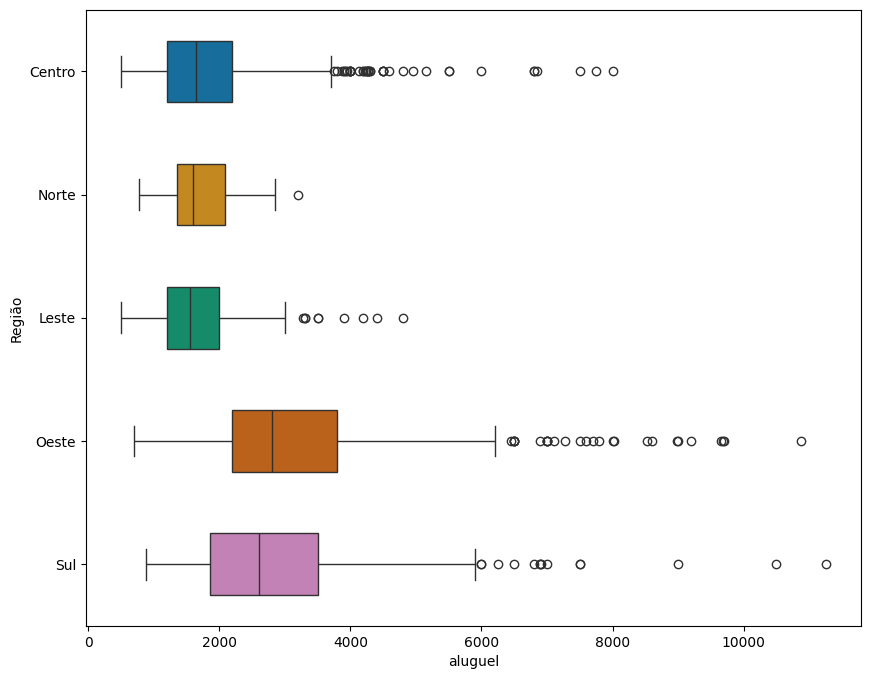

In [157]:
#Gráfico do aluguel pela região

plt.figure(figsize=(10,8))
sns.boxplot (x='aluguel', y='Região', data=basemarged, width=0.5,orient= 'h', palette='colorblind' )
plt.show()

Será que a metragem tem influência no preço???

<Axes: xlabel='metragem', ylabel='aluguel'>

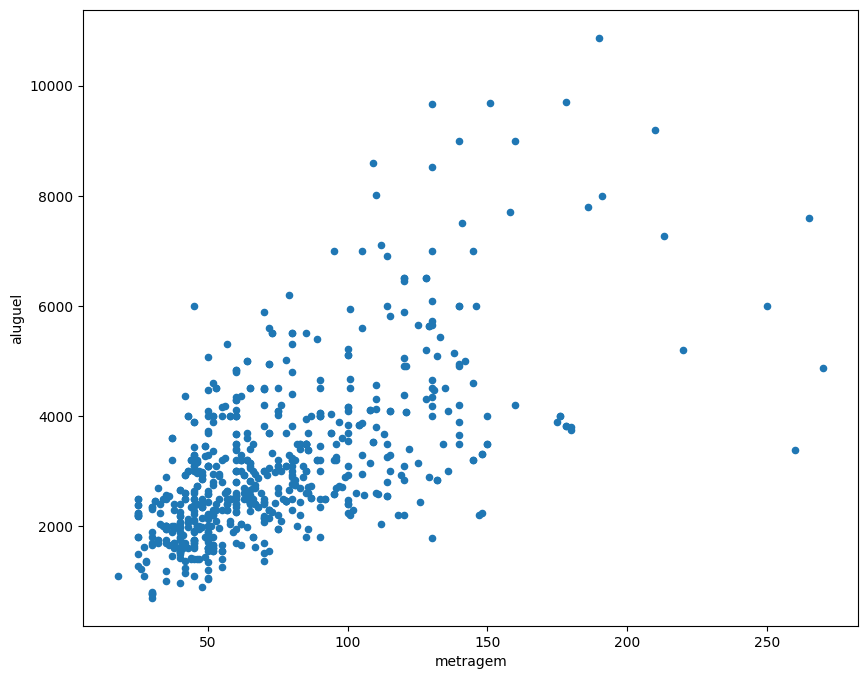

In [161]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem
basemarged[basemarged.Região== 'Oeste'].plot.scatter(y='aluguel', x='metragem', figsize=(10,8))

<Axes: xlabel='metragem', ylabel='aluguel'>

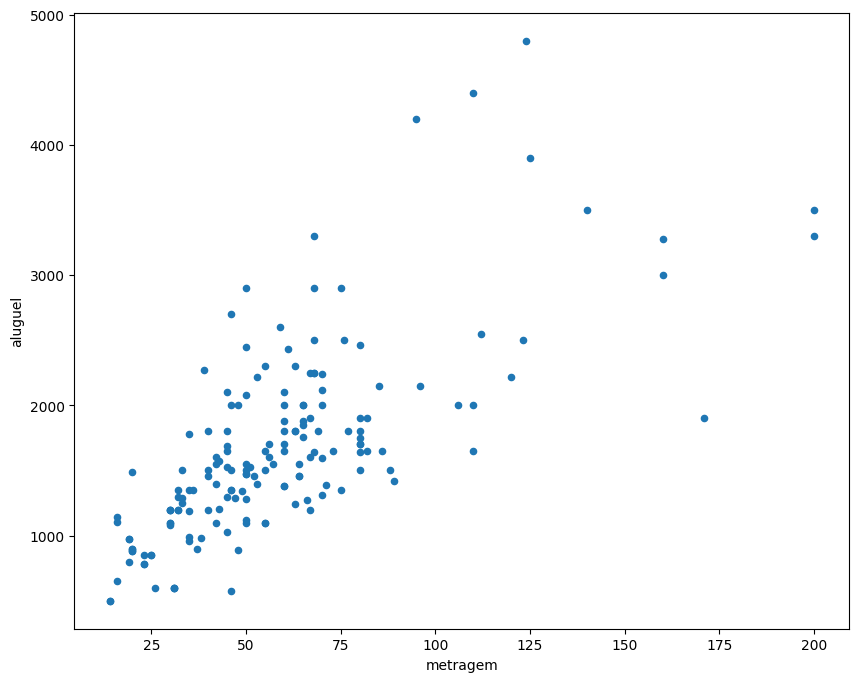

In [162]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem. Na Região Leste
basemarged[basemarged.Região== 'Leste'].plot.scatter(y='aluguel', x='metragem', figsize=(10,8))

<Axes: xlabel='metragem', ylabel='aluguel'>

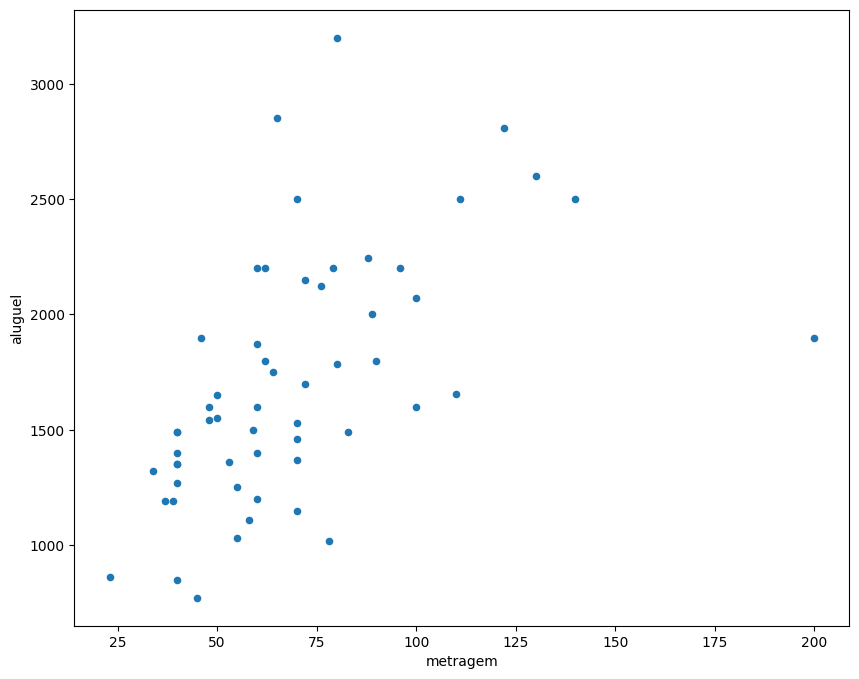

In [164]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem. Na Região Norte
basemarged[basemarged.Região== 'Norte'].plot.scatter(y='aluguel', x='metragem', figsize=(10,8))


<Axes: xlabel='metragem', ylabel='aluguel'>

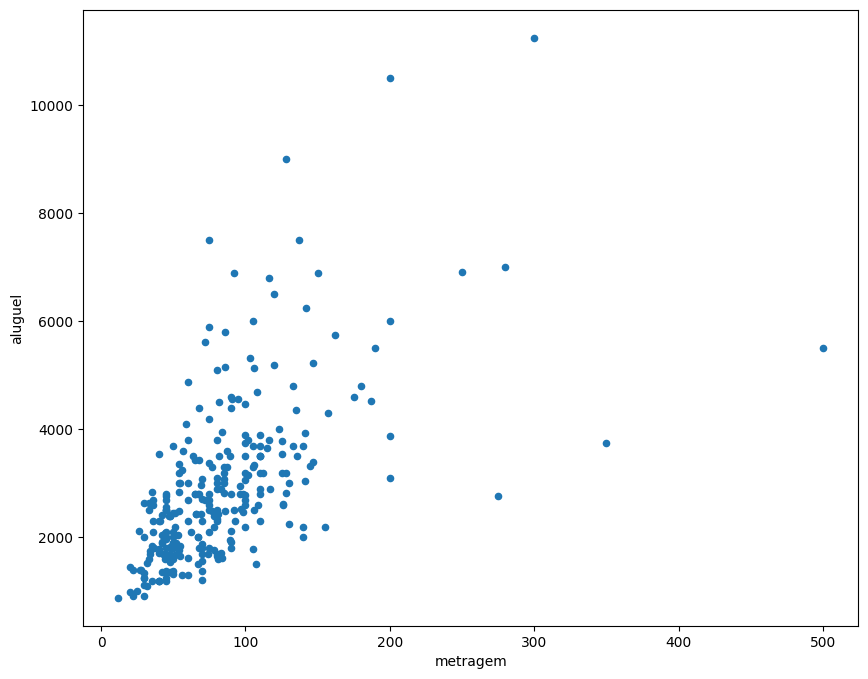

In [165]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem. Na Região Norte
basemarged[basemarged.Região== 'Sul'].plot.scatter(y='aluguel', x='metragem', figsize=(10,8))

<Axes: xlabel='metragem', ylabel='aluguel'>

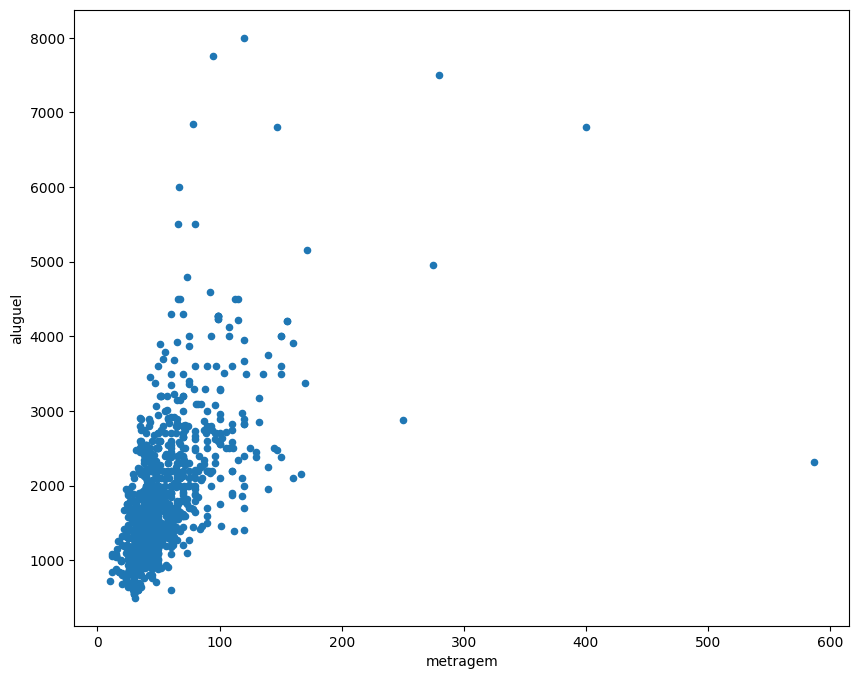

In [166]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem. Na Região Norte
basemarged[basemarged.Região== 'Centro'].plot.scatter(y='aluguel', x='metragem', figsize=(10,8))

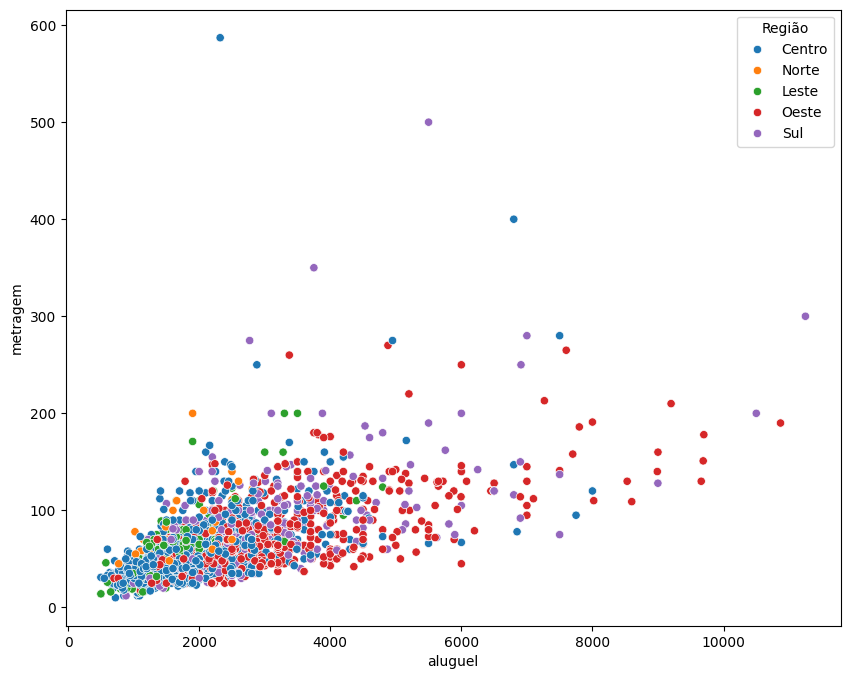

In [167]:
#Plotanto todas as regiões no mesmo gráfico
plt.figure(figsize=(10,8))
sns.scatterplot(x='aluguel', y='metragem', hue='Região', data=basemarged)
plt.show()


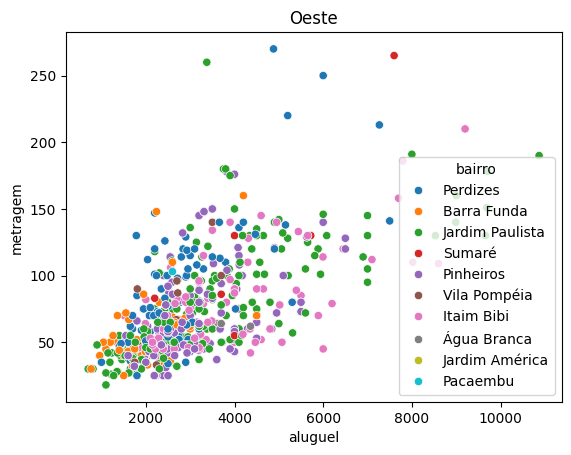

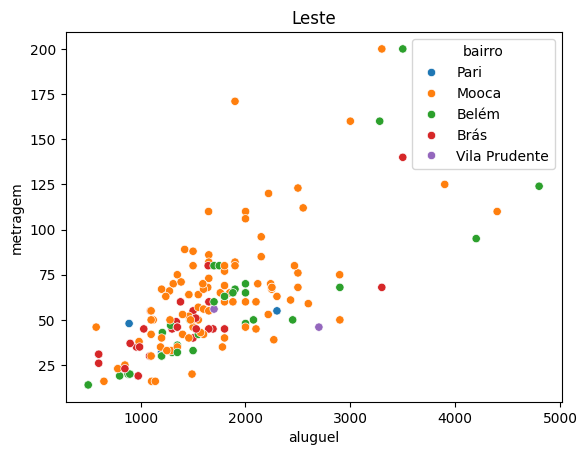

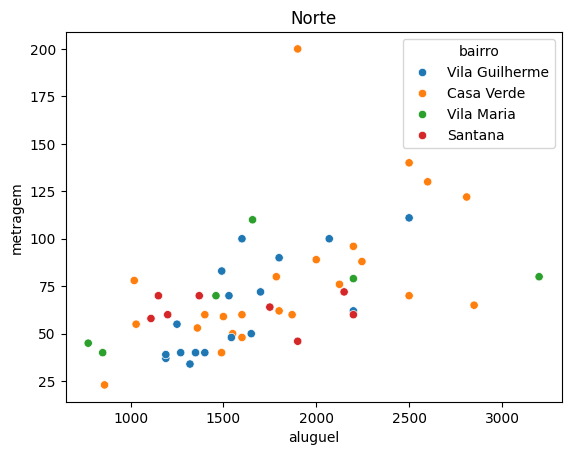

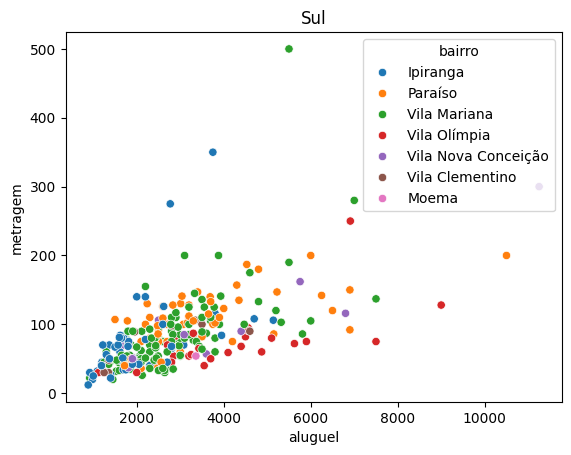

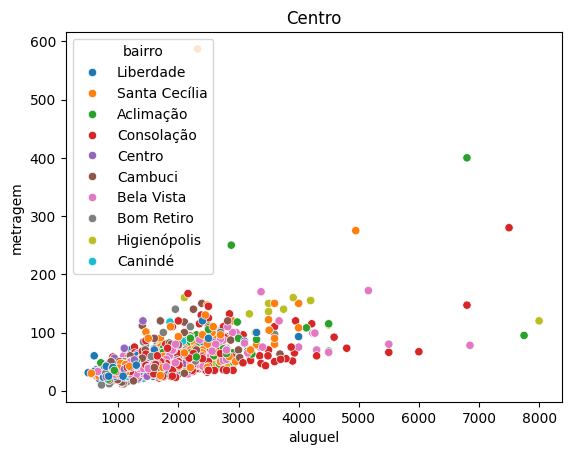

In [175]:
#Criando vários gráfico para cada região
#Oeste
#plt.figure(figsize=(6,4))
sns.scatterplot(x='aluguel', y='metragem', hue='bairro', data=basemarged[basemarged.Região=='Oeste']).set_title('Oeste')
plt.show()

#Leste
#plt.figure(figsize=(6,4))
sns.scatterplot(x='aluguel', y='metragem', hue='bairro', data=basemarged[basemarged.Região=='Leste']).set_title('Leste')
plt.show()

#Norte
#plt.figure(figsize=(10,8))
sns.scatterplot(x='aluguel', y='metragem', hue='bairro', data=basemarged[basemarged.Região=='Norte']).set_title('Norte')
plt.show()

#Sul
#plt.figure(figsize=(10,8))
sns.scatterplot(x='aluguel', y='metragem', hue='bairro', data=basemarged[basemarged.Região=='Sul']).set_title('Sul')
plt.show()

#Centro
#plt.figure(figsize=(10,8))
sns.scatterplot(x='aluguel', y='metragem', hue='bairro', data=basemarged[basemarged.Região=='Centro']).set_title('Centro')
plt.show()




Concluimos que na maioria das regiões quanto maior for a metragem maior é o preço 

In [182]:
#Verificando a Correlação entre as variáveis

#Colocando as variáveis numéricas em uma lista
numeric_columns = ['aluguel', 'condominio', 'iptu','seguro_incendio','taxa_serviço','total', 'metragem', 'quarto', 'banheiro', 'vaga_carro','andar','aceita_pet','mobilia', 'metro_prox']	
basemarged[numeric_columns].corr()


,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.547477,0.028619,0.986592,0.999937,0.180066,0.625594,0.536307,0.645005,0.566189,0.117477,0.090506,0.195236,-0.107808
condominio,0.547477,1.000000,-0.022161,0.478443,0.547217,0.089427,0.410019,0.414734,0.523017,0.566976,0.242036,0.064668,0.115346,0.000910
iptu,0.028619,-0.022161,1.000000,0.043838,0.028759,0.987828,0.054086,0.073957,0.056725,-0.011616,-0.025528,0.012266,-0.010007,0.010633
seguro_incendio,0.986592,0.478443,0.043838,1.000000,0.986566,0.190569,0.662295,0.551111,0.642922,0.559802,0.072388,0.092343,0.181506,-0.122333
taxa_serviço,0.999937,0.547217,0.028759,0.986566,1.000000,0.180184,0.625697,0.536624,0.644766,0.566322,0.117122,0.091285,0.194803,-0.108255
total,0.180066,0.089427,0.987828,0.190569,0.180184,1.000000,0.151059,0.159203,0.160734,0.085004,-0.000086,0.026351,0.020175,-0.003480
metragem,0.625594,0.410019,0.054086,0.662295,0.625697,0.151059,1.000000,0.725122,0.665260,0.448426,-0.060388,0.139389,-0.054571,-0.152064
quarto,0.536307,0.414734,0.073957,0.551111,0.536624,0.159203,0.725122,1.000000,0.663906,0.445602,-0.021817,0.119335,-0.100762,-0.200685
banheiro,0.645005,0.523017,0.056725,0.642922,0.644766,0.160734,0.665260,0.663906,1.000000,0.516650,0.044936,0.070850,-0.014080,-0.142516
vaga_carro,0.566189,0.566976,-0.011616,0.559802,0.566322,0.085004,0.448426,0.445602,0.516650,1.000000,0.193923,0.064124,0.111359,-0.144232


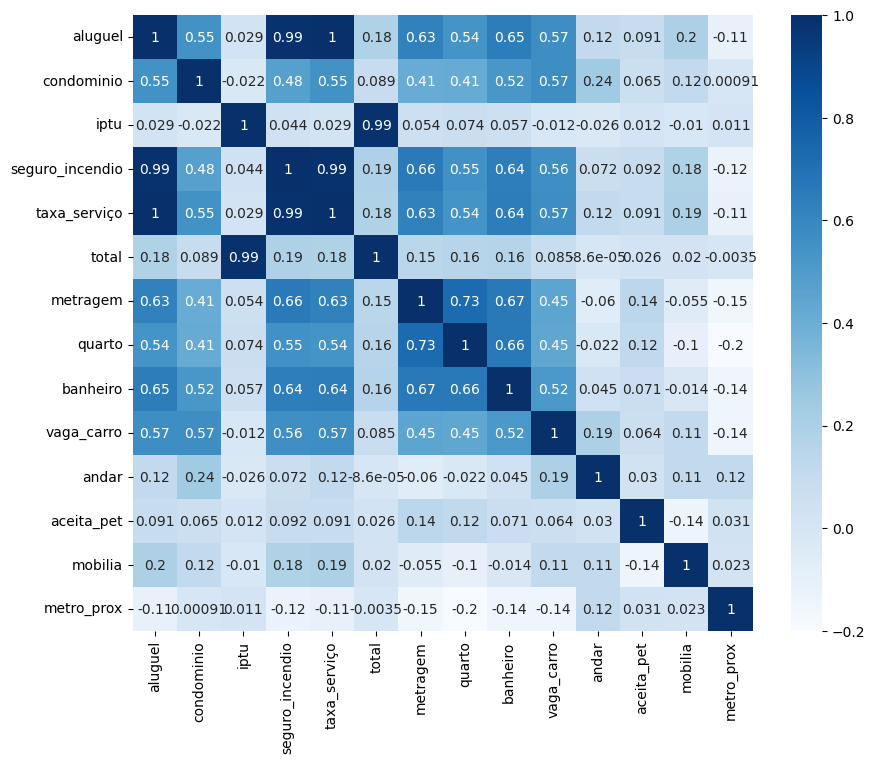

In [183]:
#Podemos visualizar a correlação entre as variáveis numéricas através de um mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(basemarged[numeric_columns].corr(), annot=True, cmap='Blues')
plt.show()

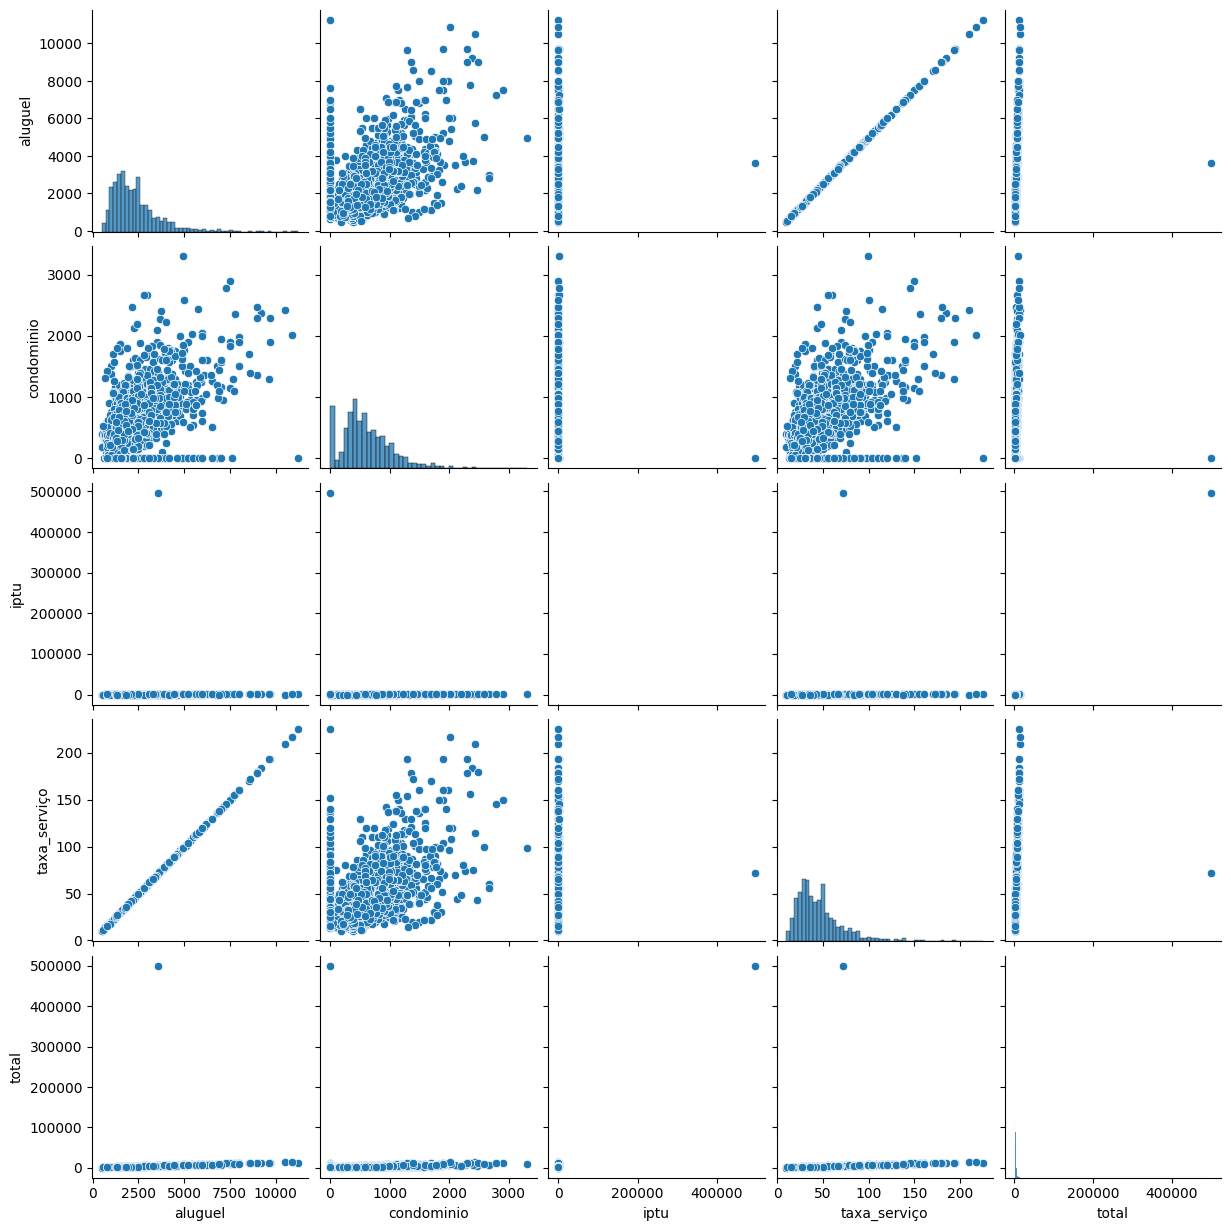

In [189]:
base3= basemarged[['aluguel','condominio', 'iptu','taxa_serviço','total']]
sns.pairplot(base3)

Vamos tentar descobrir os outliers observados nas imagens

In [190]:
#Mostre uma lista em funcão do total mais alto
base3.sort_values('total',ascending=False).head(10)

,aluguel,condominio,iptu,taxa_serviço,total
1692,3600.0,0.0,495800.0,72.0,499600.0
1599,10870.0,2008.0,575.0,217.0,13810.0
775,10500.0,2425.0,42.0,210.0,13310.0
272,9690.0,1900.0,1000.0,193.0,12910.0
1437,9700.0,2300.0,416.0,194.0,12730.0
408,9200.0,2380.0,694.0,184.0,12580.0
1535,9000.0,2480.0,496.0,180.0,12270.0
251,11250.0,0.0,584.0,225.0,12250.0
1972,8999.0,2300.0,616.0,179.0,12210.0
1955,7267.0,2780.0,1484.0,145.0,11770.0


In [193]:
#filtrando o valor mais alto da coluna total
base[base.total==base.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1707,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1707</th>
      <td>Santa Cecília</td>
      <td>3600.0</td>
      <td>0.0</td>
      <td>495800.0</td>
      <td>60.0</td>
      <td>72.0</td>
      <td>499600.0</td>
      <td>150.0</td>
      <td>4.0</td>
      <td>3.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
#O valor de iptu está muito acima da média, vamos corrigir
base3.loc[base3.total==base3.total.max(), 'iptu']=495.8

In [208]:
#O valor de total será a soma das colunas aluguel, seguro_incendio, iptu e taxa_serviço
#base3['total2'] = base3.aluguel + base3.seguro_incendio + base3.iptu + base3.taxa_serviço
base3.loc[base3.total==base3.total.max(), 'total']=base.aluguel[base.total==base.total.max()] + base.seguro_incendio[base.total==base.total.max()] + base.iptu[base.total==base.total.max()] + base.taxa_serviço[base.total==base.total.max()]
base3[base3.total==base3.total.max()]

C:\Users\Elvis\AppData\Local\Temp\ipykernel_3288\1913137526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base3.loc[base3.total==base3.total.max(), 'total']=base.aluguel[base.total==base.total.max()] + base.seguro_incendio[base.total==base.total.max()] + base.iptu[base.total==base.total.max()] + base.taxa_serviço[base.total==base.total.max()]


,aluguel,condominio,iptu,taxa_serviço,total
1599,10870.0,2008.0,575.0,217.0,13810.0


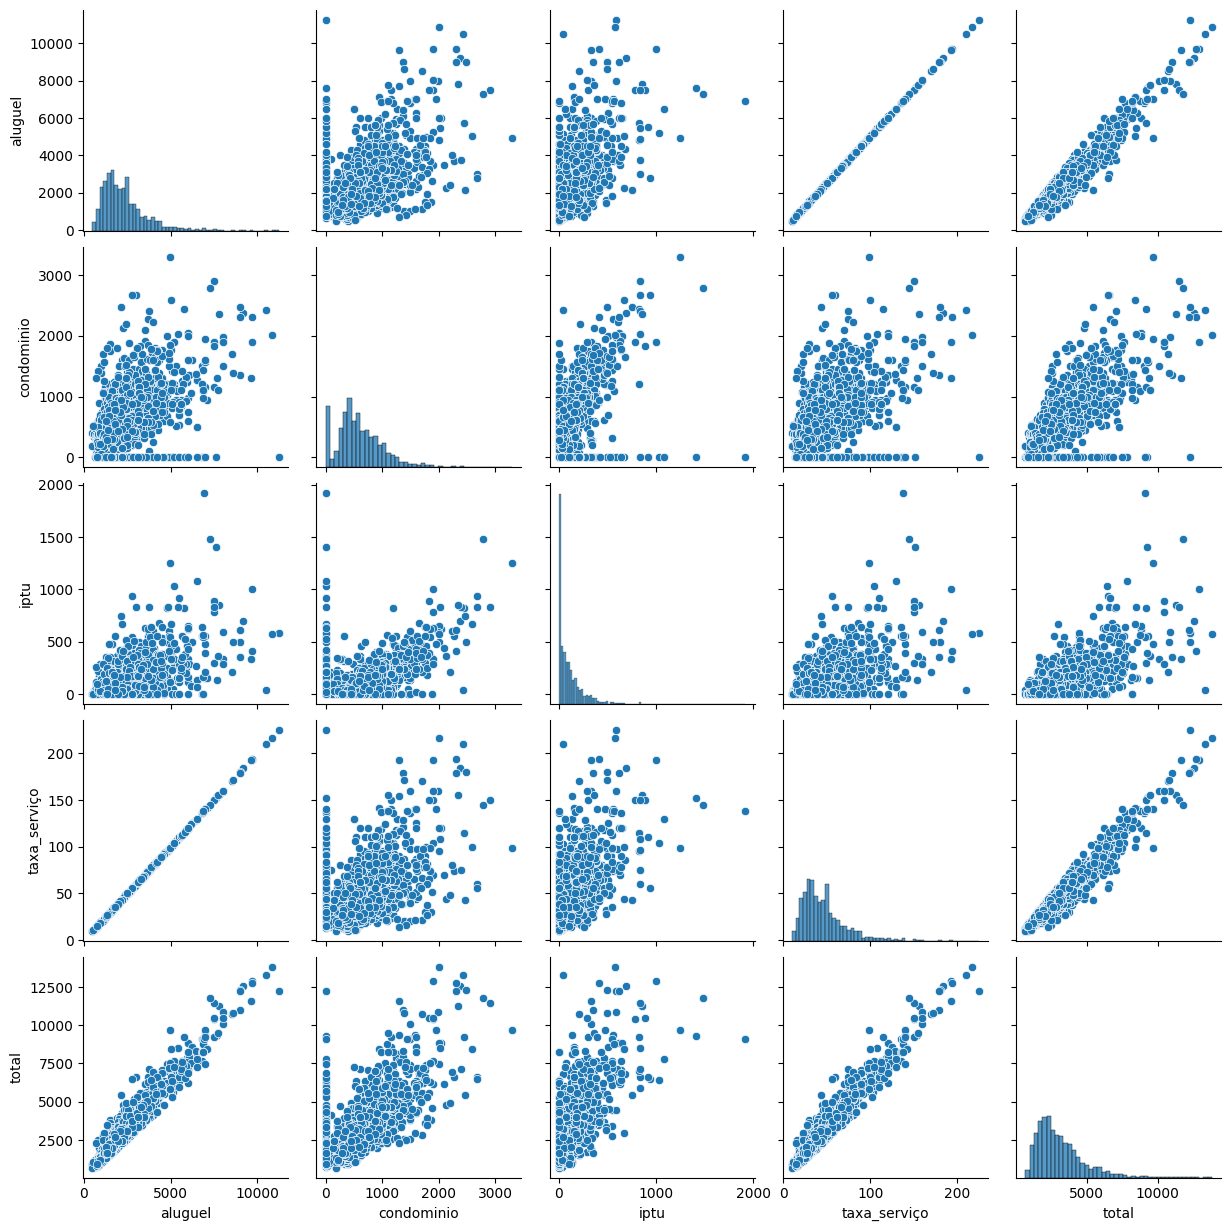

In [209]:
sns.pairplot(base3)

Eliminamos ou melhor corrigimos os valores discrepantes da coluna iptu e total


In [210]:



#Agora vamos actualizar o valor de total, que será a soma das colunas aluguel, seguro_incendio, iptu e taxa_serviço
basemarged.loc[base3.total==base3.total.max(), 'total']=base.aluguel[base.total==base.total.max()] + base.seguro_incendio[base.total==base.total.max()] + base.iptu[base.total==base.total.max()] + base.taxa_serviço[base.total==base.total.max()]
basemarged[base3.total==base3.total.max()]



,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1599,Jardim Paulista,10870.0,2008.0,495.8,138.0,217.0,NaN,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0,Jardim Paulista,Oeste


In [216]:
base[base.bairro=='Jardim Paulista' ].sort_values('aluguel',ascending=False).head(1)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0


In [218]:
#Vamos actualizar o valor de iptu e total na basemarge
#Primeiro vamos actualizar o valor de iptu
basemarged.loc[basemarged.total==basemarged.total.max(), 'iptu']=495.8 
basemarged.loc[basemarged.total==basemarged.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1692,Santa Cecília,3600.0,0.0,495.8,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


In [221]:
#Agora vamos actualizar o valor de total, que será a soma das colunas aluguel, seguro_incendio, iptu e taxa_serviço
basemarged.loc[basemarged.total==basemarged.total.max(), 'total']=basemarged.aluguel[basemarged.total==basemarged.total.max()] + basemarged.seguro_incendio[basemarged.total==basemarged.total.max()] + basemarged.iptu[basemarged.total==basemarged.total.max()] + basemarged.taxa_serviço[basemarged.total==basemarged.total.max()]
basemarged[basemarged.total==basemarged.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
775,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0,Paraíso,Sul


In [223]:
basemarged[basemarged.total==basemarged.total.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


Já resolvemos os valores de iptu e total que estão no dataset basemarged, tal como fizemos na base3 

In [224]:
basemarged[base3.total==base3.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1599,Jardim Paulista,10870.0,2008.0,495.8,138.0,217.0,NaN,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0,Jardim Paulista,Oeste


In [251]:
basemarged.loc[basemarged.Bairro.isnull()==True, 'Bairro']=='Vila Maria'
basemarged.loc[basemarged.Bairro.isnull()==True]
#Colocar 'Vila Maria' na coluna Bairro onde o valor é nulo
basemarged.loc[basemarged.Bairro.isnull()==True, 'Bairro']='Vila Maria'
basemarged[basemarged.Bairro.isnull()==True]



,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


In [252]:
basemarged.isnull().sum()

bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
Bairro             0
Região             0
dtype: int64

### <p>Tratamento de dados:</p>
Fizemos, toda actualização feita na tabela basemarged, continuaremos actualizar sempre que necessário

In [253]:
#Matriz Correlação de Pearson do dataset basemarged
# Select only numeric columns

numeric_cols = basemarged.select_dtypes(include=[np.number])

# Calculate correlation
numeric_cols.corr(method='pearson')


,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.547477,0.606404,0.986592,0.999937,0.971631,0.625594,0.536307,0.645005,0.566189,0.117477,0.090506,0.195236,-0.107808
condominio,0.547477,1.000000,0.557174,0.478443,0.547217,0.721523,0.410019,0.414734,0.523017,0.566976,0.242036,0.064668,0.115346,0.000910
iptu,0.606404,0.557174,1.000000,0.622163,0.606332,0.699213,0.590834,0.488119,0.588615,0.612238,0.015306,0.053523,0.074565,-0.087769
seguro_incendio,0.986592,0.478443,0.622163,1.000000,0.986566,0.945840,0.662295,0.551111,0.642922,0.559802,0.072388,0.092343,0.181506,-0.122333
taxa_serviço,0.999937,0.547217,0.606332,0.986566,1.000000,0.971508,0.625697,0.536624,0.644766,0.566322,0.117122,0.091285,0.194803,-0.108255
total,0.971631,0.721523,0.699213,0.945840,0.971508,1.000000,0.642942,0.564856,0.685569,0.636642,0.152925,0.090991,0.188159,-0.092023
metragem,0.625594,0.410019,0.590834,0.662295,0.625697,0.642942,1.000000,0.725122,0.665260,0.448426,-0.060388,0.139389,-0.054571,-0.152064
quarto,0.536307,0.414734,0.488119,0.551111,0.536624,0.564856,0.725122,1.000000,0.663906,0.445602,-0.021817,0.119335,-0.100762,-0.200685
banheiro,0.645005,0.523017,0.588615,0.642922,0.644766,0.685569,0.665260,0.663906,1.000000,0.516650,0.044936,0.070850,-0.014080,-0.142516
vaga_carro,0.566189,0.566976,0.612238,0.559802,0.566322,0.636642,0.448426,0.445602,0.516650,1.000000,0.193923,0.064124,0.111359,-0.144232


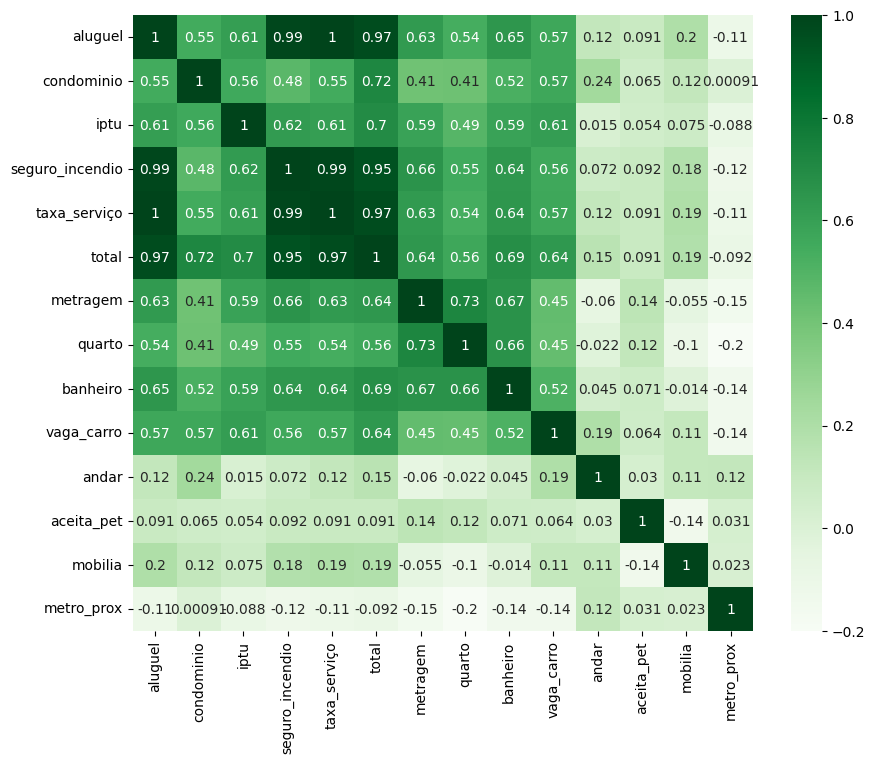

In [256]:
#Podemos visualizar a correlação entre as variáveis numéricas através de um mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(basemarged[numeric_columns].corr(), annot=True, cmap='Greens')
plt.show()

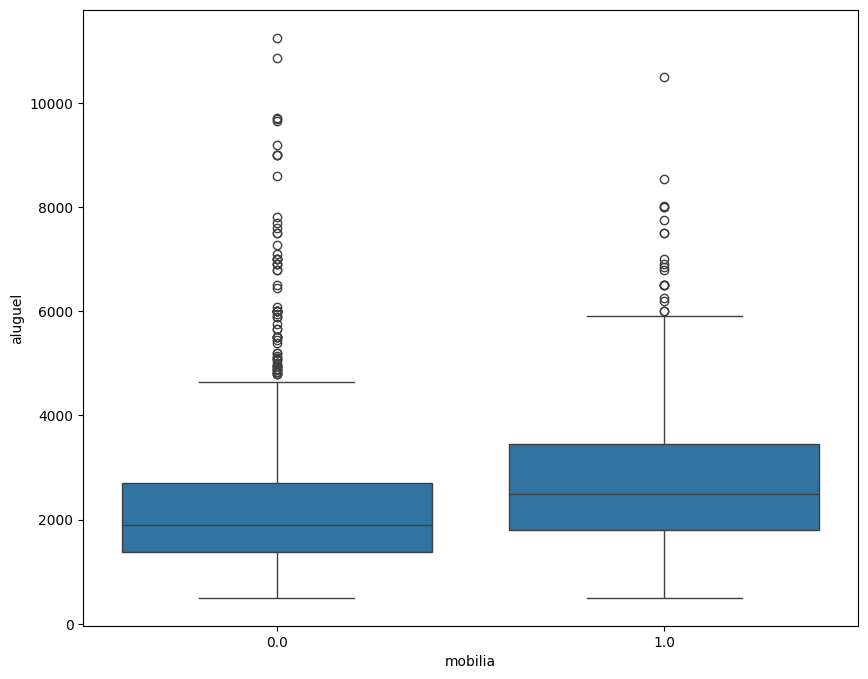

In [257]:
#Visualizar a coluna aluguel em função da coluna mobilia
plt.figure(figsize=(10,8))
sns.boxplot(x='mobilia', y='aluguel', data=basemarged)
plt.show()

Aqui está um detalhamento do que vemos para cada grupo:

Grupo 0 (mobilia 0.0):

A caixa representa o intervalo interquartil (IQR) onde se encontram os 50% médios dos dados.
A linha no meio da caixa é a mediana do conjunto de dados, que parece estar em torno de 2.500.
Os "bigodes" se estendem para os menores e maiores valores dentro de 1,5 * IQR dos quartis, sugerindo o intervalo de pontos de dados típicos.
Os pontos acima do bigode superior são outliers, indicando preços de aluguel que são excepcionalmente altos em comparação com o resto dos dados.
Grupo 1 (mobilia 1.0):

Esta caixa também é o IQR e parece ter uma mediana semelhante ao Grupo 0.
A faixa do IQR é mais estreita, indicando menor variabilidade nos preços de aluguel para esse grupo.
Há também outliers, que sugerem que alguns preços de aluguel são muito mais altos do que os demais.
As principais conclusões deste boxplot são:

Ambos os grupos têm um preço médio de aluguel semelhante.
O grupo 0 tem uma faixa maior de preços de aluguel, indicando maior variabilidade.
Ambos os grupos têm vários outliers de alto custo.

## Tratamento de Dados

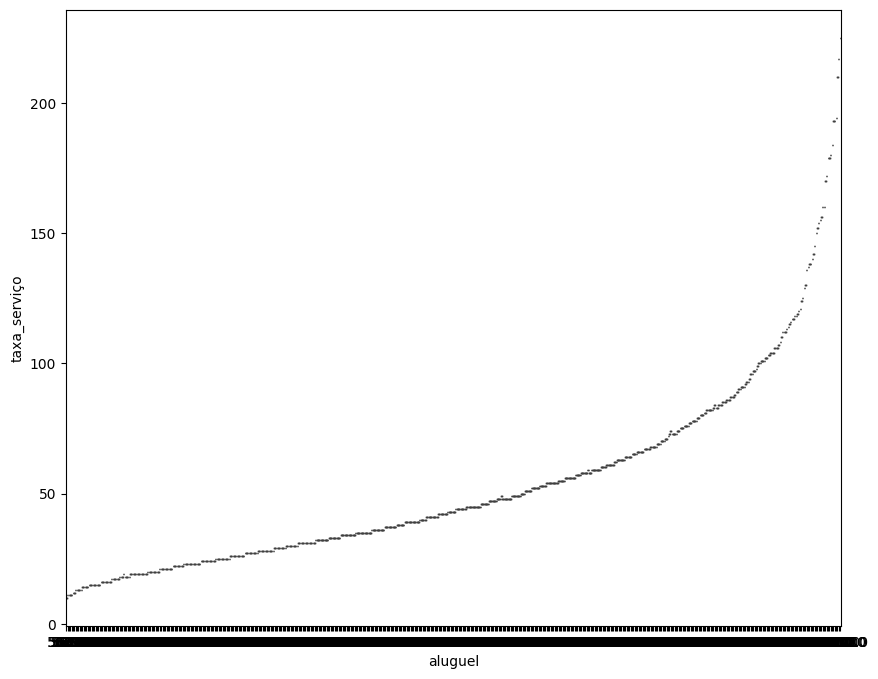

In [258]:
#Verificandoa a taxa de serviço em função do aluguel
plt.figure(figsize=(10,8))
sns.boxplot(x='aluguel', y='taxa_serviço', data=basemarged) 
plt.show()

In [262]:
#Verificandoa a taxa de serviço divindo pelo aluguel e achar o percentual   
round(basemarged.taxa_serviço/basemarged.aluguel*100,2)

0       2.00
1       1.93
2       1.97
3       2.00
4       2.00
        ... 
2229    2.00
2230    2.00
2231    1.94
2232    2.00
2233    2.00
Length: 2234, dtype: float64

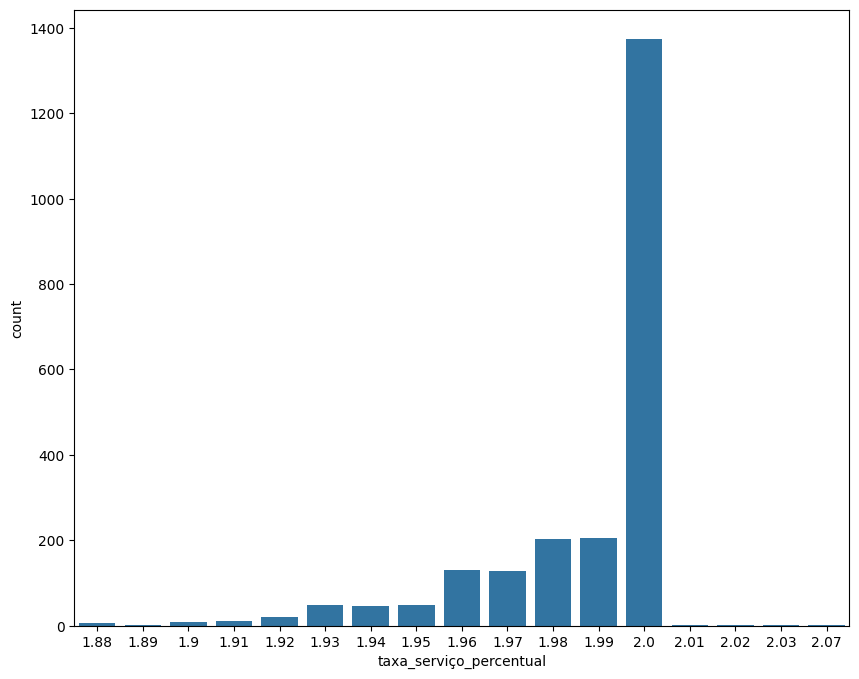

In [264]:
#Adicionando auma nova coluna taxa_serviço_percentual na basemarged
basemarged['taxa_serviço_percentual']=round(basemarged.taxa_serviço/basemarged.aluguel*100,2)
#Vamos contar a quantidade de imóveis que tem taxa de serviço percual 
basemarged.taxa_serviço_percentual.value_counts()
#Mostrar essa informação em um gráfico
plt.figure(figsize=(10,8))
sns.countplot(x='taxa_serviço_percentual', data=basemarged)
plt.show()

A maioria dos valores parece estar em torno de 2%, indicando uma possível uniformidade na forma como a taxa de serviço é calculada em relação ao aluguel. No entanto, há algumas variações (como 1,93% ou 1,94%), o que pode ser devido a diferenças específicas nas políticas de cobrança ou características dos imóveis.

A taxa de serviço não me vai ajudar a prever o preço do aluguel, por terem uma relação muito directa, <div color= green> pois eu só sei a taxa de serviço se souber o preço do aluguel </div>


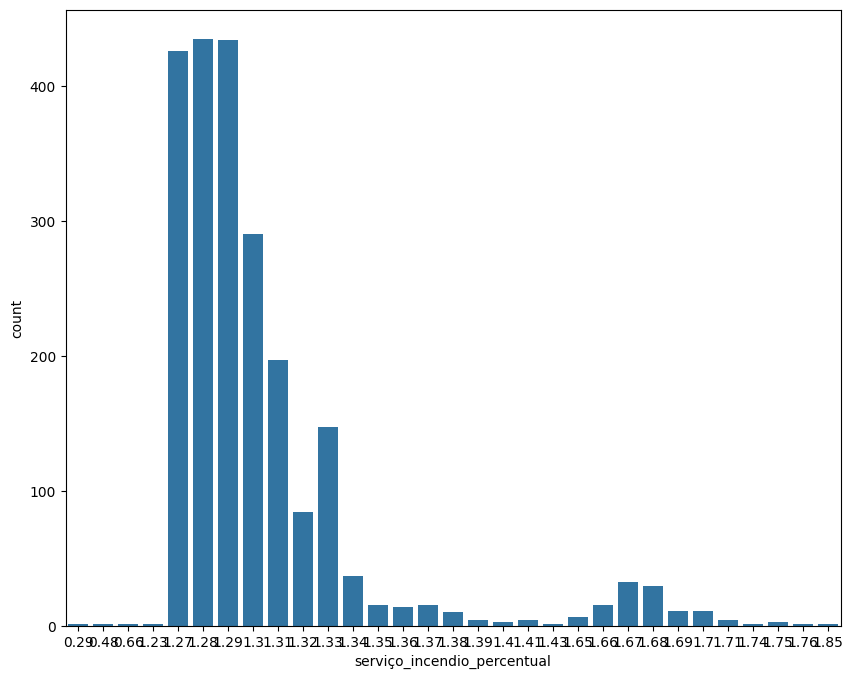

In [265]:
# Vericando o mesmo para o seguro de incêndio
round(basemarged.seguro_incendio/basemarged.aluguel*100,2)
basemarged['serviço_incendio_percentual']=round(basemarged.seguro_incendio/basemarged.aluguel*100,2)

#Mostrar essa informação em um gráfico
plt.figure(figsize=(10,8))
sns.countplot(x='serviço_incendio_percentual', data=basemarged)
plt.show()

O gráfico sugere que, para a maioria dos imóveis, o seguro contra incêndio representa uma pequena porcentagem do custo total do aluguel. Isto pode ser devido a regulamentações do seguro que mantêm os custos baixos, ou pode refletir a realidade do mercado de seguros na área de onde os dados foram coletados.
Podemos considerar a taxa de serviço e o seguro de incendio como Leakage

### <p color=Orange> Leakage de Características (Feature Leakage):</p> 
Ocorre quando os dados de entrada incluem informações que não estariam disponíveis no momento em que as previsões precisam ser feitas. Por exemplo, se um modelo está tentando prever a ocorrência de uma doença e inclui resultados de exames que só seriam realizados após o diagnóstico da doença, isso constitui um vazamento de característica.

In [266]:
#Mostrar a primeira linha da basemarged
basemarged.head(1)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região,taxa_serviço_percentual,serviço_incendio_percentual
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Liberdade,Centro,2.0,1.32


In [267]:
#Vamos eliminar as colunas seguro_incendio, taxa_serviço, taxa_serviço_percentual e serviço_incendio_percentual
basemarged.drop(['seguro_incendio', 'taxa_serviço', 'taxa_serviço_percentual', 'serviço_incendio_percentual'], axis=1, inplace=True)
basemarged.head(3)

,bairro,aluguel,condominio,iptu,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Liberdade,1900.0,424.0,5.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Liberdade,Centro
1,Santa Cecília,1190.0,460.0,0.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Santa Cecília,Centro
2,Aclimação,2330.0,450.0,5.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Aclimação,Centro


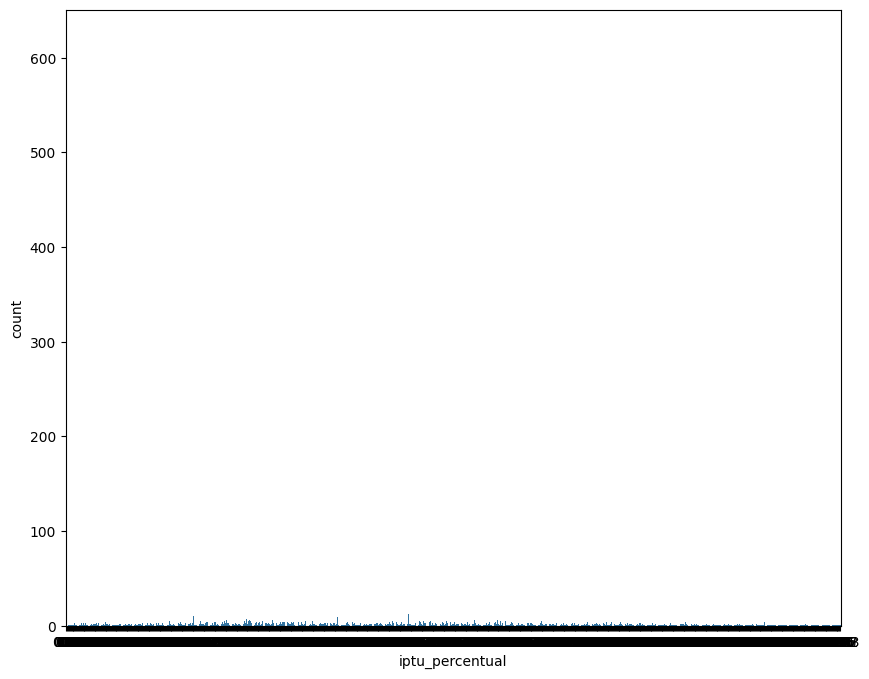

In [268]:
# Vericando o mesmo para o iptu
round(basemarged.iptu/basemarged.aluguel*100,2)
basemarged['iptu_percentual']=round(basemarged.iptu/basemarged.aluguel*100,2)

#Mostrar essa informação em um gráfico
plt.figure(figsize=(10,8))
sns.countplot(x='iptu_percentual', data=basemarged)
plt.show()

É visivel os valores de iptu serem muito baixos pelo facto de alem do aluguel, dependerem também do bairro, região, etc.

Então vamos mante-lo.

In [269]:
#Como vamos eliminar o iptu, vamos eliminar a coluna iptu_percentual
basemarged.drop(['iptu_percentual'], axis=1, inplace=True)

#Vamos eliminar a coluna total, porque se eu não tenho as colunas que eliminamos(Leakage), não faz sentido ter a coluna total  
basemarged.drop(['total'], axis=1, inplace=True)  

Alguns modelos não conseguem lidar com texto, então vamos dar tratar nessas colunas

In [270]:
basemarged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bairro      2234 non-null   object 
 1   aluguel     2234 non-null   float64
 2   condominio  2234 non-null   float64
 3   iptu        2234 non-null   float64
 4   metragem    2234 non-null   float64
 5   quarto      2234 non-null   float64
 6   banheiro    2234 non-null   float64
 7   vaga_carro  2234 non-null   float64
 8   andar       2234 non-null   float64
 9   aceita_pet  2234 non-null   float64
 10  mobilia     2234 non-null   float64
 11  metro_prox  2234 non-null   float64
 12  Bairro      2234 non-null   object 
 13  Região      2234 non-null   object 
dtypes: float64(11), object(3)
memory usage: 244.5+ KB


Uma vez que tem modelos que não aceitam valores textuais e além disso, temos bairros com poucos registos, seria melhor utilizar a região

In [272]:
#Vamos eliminar a coluna Bairro e bairro    
basemarged.drop(['Bairro', 'bairro'], axis=1, inplace=True)
basemarged.head(3)

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região
0,1900.0,424.0,5.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Centro
1,1190.0,460.0,0.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Centro
2,2330.0,450.0,5.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Centro


Podemos fazer o One Hot Econding usando o .get_dumies() para transformar a coluna de região em novas colunas numérias e o concat() para unir essas colunas com a nossa basemarged

In [273]:
#Fazer o One Host Enconding usando o get_dummies para transformar a coluna Região em novas colunas númericas e o concat para juntar as novas colunas com a basemarged
basemarged = pd.concat([basemarged, pd.get_dummies(basemarged.Região)], axis=1)
basemarged.head(3)

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região,Centro,Leste,Norte,Oeste,Sul
0,1900.0,424.0,5.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Centro,True,False,False,False,False
1,1190.0,460.0,0.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Centro,True,False,False,False,False
2,2330.0,450.0,5.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Centro,True,False,False,False,False


In [280]:
# Convert True/False to 1/0
basemarged = basemarged * 1
basemarged

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região,Centro,Leste,Norte,Oeste,Sul
0,1900.0,424.0,5.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Centro,1,0,0,0,0
1,1190.0,460.0,0.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Centro,1,0,0,0,0
2,2330.0,450.0,5.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Centro,1,0,0,0,0
3,1850.0,418.0,6.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,Centro,1,0,0,0,0
4,2200.0,392.0,10.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0,Norte,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,1300.0,590.0,125.0,44.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,Centro,1,0,0,0,0
2230,1950.0,440.0,0.0,48.0,1.0,1.0,0.0,8.0,1.0,0.0,1.0,Centro,1,0,0,0,0
2231,772.0,0.0,100.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Norte,0,0,1,0,0
2232,1800.0,771.0,42.0,69.0,3.0,1.0,1.0,3.0,1.0,0.0,1.0,Leste,0,1,0,0,0


In [281]:
#Eliminando a coluna Região
basemarged.drop(['Região'], axis=1, inplace=True)
basemarged.head(3)

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
0,1900.0,424.0,5.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,1,0,0,0,0
1,1190.0,460.0,0.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,1,0,0,0,0
2,2330.0,450.0,5.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,1,0,0,0,0


## Definição do modelo

In [282]:
#Vamos colocar quais são as nossas varáveis preditoras e a variável target
#Estamos a copiar todas colunas da basemarged para a variável x, menos a coluna aluguel
x = basemarged.drop(['aluguel'], axis=1)
#Estamos a copiar a coluna aluguel para a variável y
y = basemarged.aluguel


#Antes de definir o modelo, vamos separar os dados em treino e teste
from sklearn.model_selection import train_test_split
#Vamos separar 30% dos dados para teste e 70% para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape



((1563, 15), (671, 15), (1563,), (671,))

In [283]:
x_train.head(3)

,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
1891,1850.0,621.0,110.0,3.0,4.0,2.0,5.0,1.0,0.0,1.0,0,0,0,0,1
949,645.0,149.0,60.0,2.0,2.0,1.0,15.0,1.0,0.0,1.0,0,0,0,0,1
1117,480.0,0.0,60.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0,1,0,0,0,0


Depois de seperar o nosso dataset em test e treino, podemos usar a base de treino para criar o nosso modelo usando diferentes algoritmos

In [287]:
#Treinando o modelo
reg=LinearRegression().fit(x_train, y_train)


#Avaliando o ajuste do modelo aos nossos dados de Treino
reg.score(x_train, y_train)

0.6352895835641419

In [290]:

#Fazendo a previsão com o modelo anterior
y_pred = reg.predict(x_test)

#Avaliando o erro
mean_absolute_error(y_test, y_pred)

525.5089342712561

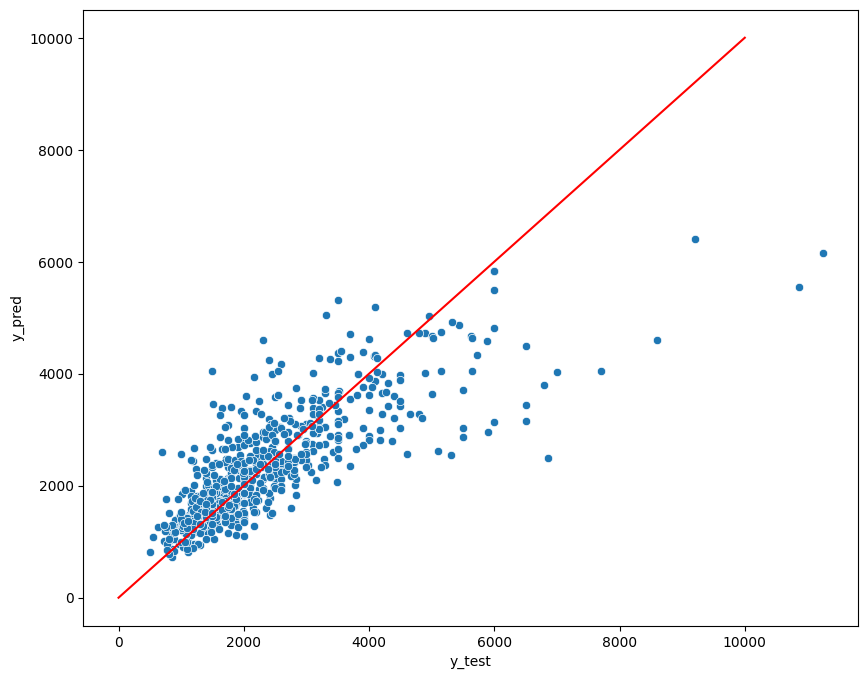

In [294]:
#Visualizando o erro graficamente
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
#Plotando a linha de tendência
plt.plot([0, 10000], [0, 10000], color='red')
plt.show()

Após a aplicação de regressão, podemos aplicar outros modelos, como é o caso da Árvore de Decisão (Regressão)

In [295]:

#Treinando o modelo de árvore de decisão e fazendo o fit
regArvore=tree.DecisionTreeRegressor().fit(x_train, y_train)

#Avaliando o ajuste do modelo aos nossos dados de Treino
regArvore.score(x_train, y_train)

0.9999988824424885

In [297]:
#Fazendo a previsão com o modelo anterior
y_predArvore = regArvore.predict(x_test)

#Avaliando o erro
mean_absolute_error(y_test, y_predArvore)

662.0692995529062

O erro da arvore de decisão(662) é maior que na regressão linear (526) 

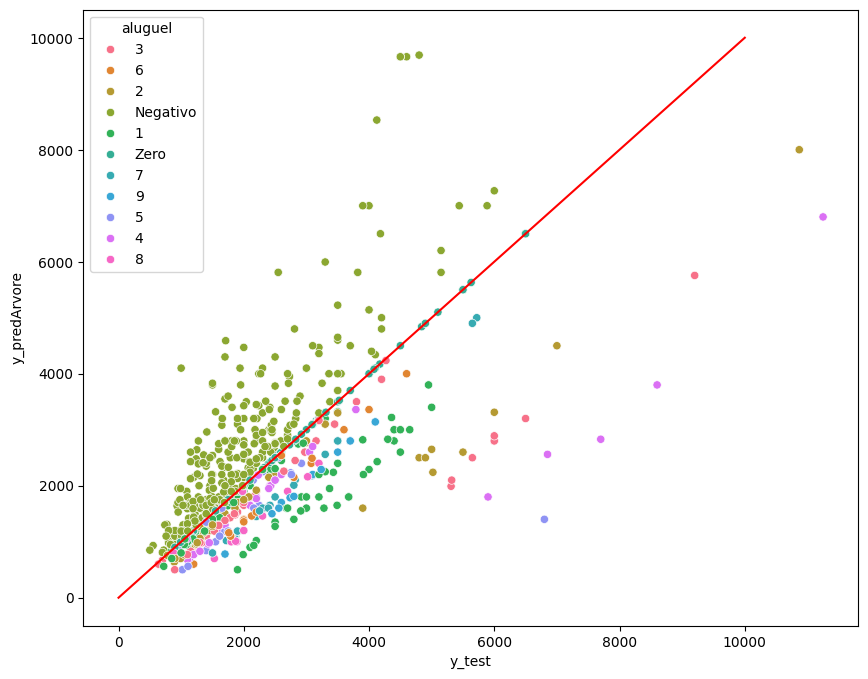

In [303]:
#Visualizando o erro graficamente
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_predArvore, hue=(y_test-y_predArvore).astype(str).str[0].replace({'-':'Negativo', '0':'Zero', '+':'Positivo'}))
plt.xlabel('y_test')
plt.ylabel('y_predArvore')
#Plotando a linha de tendência
plt.plot([0, 10000], [0, 10000], color='red')
plt.show()


Importando o erro quadrático médio